# Statistics notebook for behavioral data
Simple descriptive statistics such as mean age etc.

In [151]:
import numpy as np
import pandas as pd
import os
import os.path as op
import glob
from scipy.stats import pearsonr, f_oneway, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
home = '/home/lukas/Dropbox/PhD_projects/DecodingEmotions_SCAN/Behavioral_data'
demographics_file = op.join(home, 'demographics.csv')
demogr = pd.read_csv(demographics_file, sep=',')

m_age = demogr['age'].mean()
std_age = demogr['age'].std()
number_female = np.sum([g == 'F' for g in demogr['gender']])
print('Mean age: %f, std age: %f' % (m_age, std_age))
print('Proportion female: %f' % number_female)

Mean age: 21.476190, std age: 1.749830
Proportion female: 14.000000


In [105]:
validation_file = op.join(home, 'validation_behav.csv')
val_data = pd.read_csv(validation_file, sep=',')
df_long = pd.melt(val_data, id_vars=['sub_name'], value_vars=['suc_other_act', 'suc_other_int', 'suc_other_sit',
                                                              'suc_self_act', 'suc_self_int', 'suc_self_sit'])
df_long['condition'] = ['self' if 'self' in c else 'other' for c in df_long['variable']]

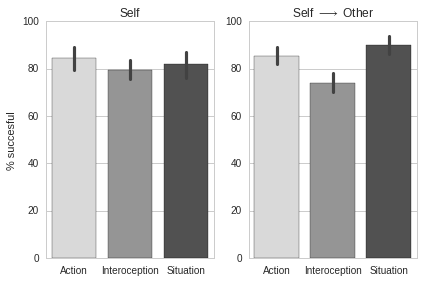

In [146]:
sns.set_style("whitegrid")

ax1 = plt.subplot(121)
sns.barplot(x='variable', y='value', data=df_long[df_long['condition']=='self'], palette='Greys')
ax1.set_ylabel('% succesful'), ax1.set_xlabel('')
ax1.set_xticklabels(['Action', 'Interoception', 'Situation'])
ax1.set_title('Self')
ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
sns.barplot(x='variable', y='value', data=df_long[df_long['condition']=='other'], palette='Greys')
ax2.set_ylabel(''), ax2.set_xlabel('')
ax2.set_xticklabels(['Action', 'Interoception', 'Situation'])
ax2.set_title('Self $\longrightarrow$ Other')
plt.tight_layout()

plt.savefig('/home/lukas/Dropbox/PhD_projects/DecodingEmotions_SCAN/Behavioral_data/success.png', dpi=400)

In [155]:
fval, pval = f_oneway(val_data['suc_self_act'], val_data['suc_self_int'], val_data['suc_self_sit'])
print('Self-data: F(2, %i) = %f, p = %f' % (val_data.shape[0]-3, fval, pval))

fval, pval = f_oneway(val_data['suc_other_act'], val_data['suc_other_int'], val_data['suc_other_sit'])
print('Other-data: F(2, %i) = %f, p = %f' % (val_data.shape[0]-3, fval, pval))

tval_si, pval_si = ttest_ind(val_data['suc_other_sit'], val_data['suc_other_int'])
tval_si, pval_si = ttest_ind(val_data['suc_other_sit'], val_data['suc_other_int'])
tval_si, pval_si = ttest_ind(val_data['suc_other_sit'], val_data['suc_other_int'])

Self-data: F(2, 17) = 1.031114, p = 0.363164
Other-data: F(2, 17) = 17.740571, p = 0.000001


In [44]:
import nibabel as nib
val_dir = '/media/lukas/data/DecodingEmotions/Validation_set'
zinnen = glob.glob(op.join(val_dir, 'glm_zinnen/100000iter_results/vox_results_mni/*.nii.gz'))

average = np.zeros((91, 109, 91, len(zinnen)))
for i, f in enumerate(zinnen):
    average[:, :, :, i] = nib.load(f).get_data()

av, se = average-0.3333, average.std(axis=0) / np.sqrt(len(zinnen)-1)
av[av<0] = 0